# kNN

This notebook is for practical implementations of kNN. For the relevant theory, please refer to the Supervised Learning workbook (link to be added).

## Algorithm

## Implementation

In [32]:
def euclidean_dist(arr1, arr2):
    dist = 0
    for x1, x2 in zip(arr1, arr2):
        dist += (x1-x2)**2
    return dist**0.5



class kNN:
    def __init__(self, k, metric, algorithm = 'brute'):
        self.k = k
        self.metric = metric
        self.algorithm = algorithm
    
    def fit(self, X, y):
        
        # depending on the type of algorithm that you want to go for, the fit function
        # should generate the necessary data structures!
        
        if self.algorithm == 'brute':
            self.X = X
            self.y = y
    
    def predict(self, X):
        y_pred = []
        for x_test in X:
            dist = [self.metric(x_test, x_train) for x_train in self.X] 
            dist, y = zip(*sorted(zip(dist, self.y)))
            y = y[:self.k]
            y_pred.append(max(y,key=y.count))
        return y_pred

## Example

- make sure to use the log(nsamples) to estimate which k to use
- add stuff about evaluating the algorithm, error, cross validation, plot of the voronoi cells ?

In [63]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


def plot_classes(X, y):
    for i in np.unique(y):
        plt.plot(X[y == i, 0], X[y == i, 1], '.')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

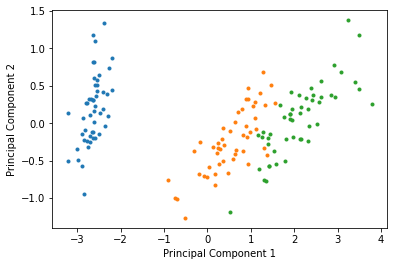

In [115]:
X,y = load_iris(return_X_y = True)
model = PCA(2)
X = model.fit_transform(X)

plot_classes(X, y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

model fitted
model predicted


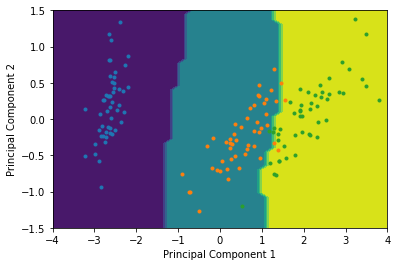

In [123]:
x1_ = np.linspace(-4,4, 50)
x2_ = np.linspace(-1.5, 1.5, 50)
x1, x2 = np.meshgrid(x1_, x2_)
x1 = x1.reshape(-1,1)
x2 = x2.reshape(-1,1)
X_grid = np.concatenate((x1, x2), axis = 1)

model = kNN(30, euclidean_dist)

model.fit(X, y)
print('model fitted')
y_pred = np.array(model.predict(X_grid))
print('model predicted')
plt.contourf(x1_, x2_, y_pred.reshape(-50,50))
plot_classes(X, y)

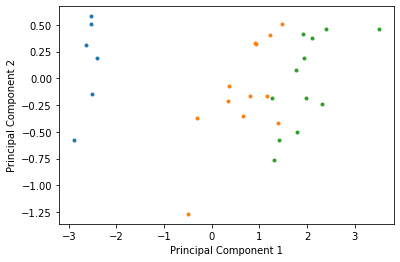

In [73]:
model = kNN(1, euclidean_dist)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plot_classes(X_test, y_pred)

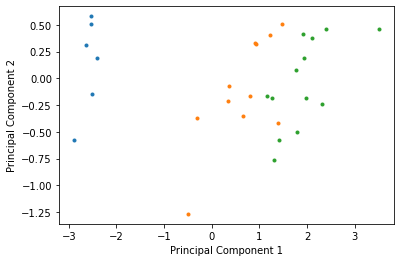